<a href="https://colab.research.google.com/github/thorat1607/thorat1607/blob/Bharat_Intern/Task_3_Number_recognition_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import pandas as pd

In [ ]:
# Load training data from CSV
train_data = pd.read_csv('/content/train.csv')

# Extract features (pixel values) and labels from the training data
train_images = train_data.drop('label', axis=1).values
train_labels = train_data['label'].values

# Normalize pixel values to the range [0, 1]
train_images = train_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels, 10)

# Load testing data from CSV
test_data = pd.read_csv('/content/test.csv')

# Extract features (pixel values) from the testing data
test_images = test_data.values

# Normalize pixel values to the range [0, 1]
test_images = test_images / 255.0

In [ ]:
# Build the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_images.reshape(-1, 784), train_labels, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
263/263 [==============================] - 3s 7ms/step - loss: 0.4368 - accuracy: 0.8791 - val_loss: 0.2202 - val_accuracy: 0.9358
Epoch 2/10
263/263 [==============================] - 1s 5ms/step - loss: 0.1786 - accuracy: 0.9481 - val_loss: 0.1463 - val_accuracy: 0.9577
Epoch 3/10
263/263 [==============================] - 2s 6ms/step - loss: 0.1268 - accuracy: 0.9629 - val_loss: 0.1399 - val_accuracy: 0.9607
Epoch 4/10
263/263 [==============================] - 1s 5ms/step - loss: 0.0949 - accuracy: 0.9728 - val_loss: 0.1108 - val_accuracy: 0.9663
Epoch 5/10
263/263 [==============================] - 1s 6ms/step - loss: 0.0743 - accuracy: 0.9785 - val_loss: 0.1110 - val_accuracy: 0.9658
Epoch 6/10
263/263 [==============================] - 1s 5ms/step - loss: 0.0589 - accuracy: 0.9822 - val_loss: 0.1023 - val_accuracy: 0.9688
Epoch 7/10
263/263 [==============================] - 2s 8ms/step - loss: 0.0481 - accuracy: 0.9862 - val_loss: 0.1038 - val_accuracy: 0.9682
Epoch 

In [ ]:
predictions = model.predict(test_images)

# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)


875/875 [==============================] - 2s 2ms/step


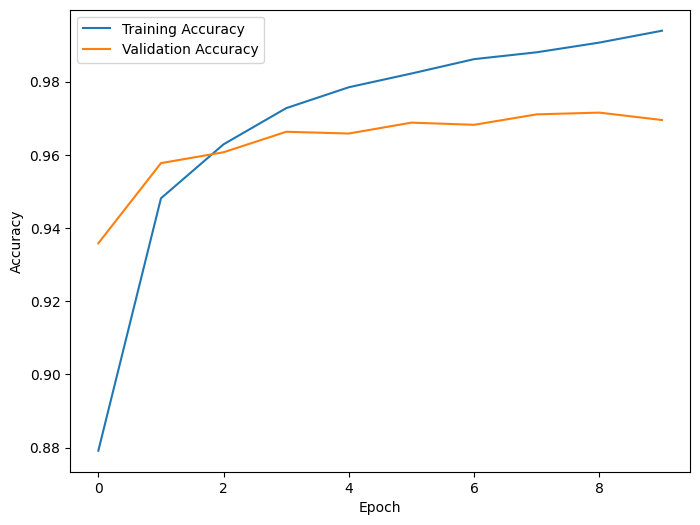

In [ ]:
# Plot the training history
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

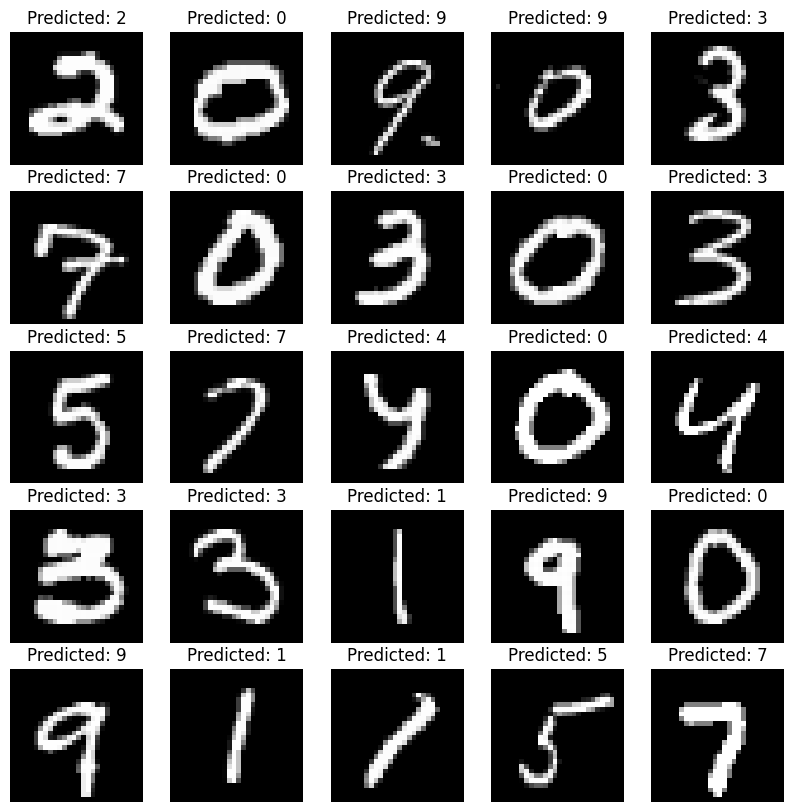

In [ ]:
# Plot some test images with their predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_labels[i]}')
    plt.axis('off')
plt.show()